# An agent that handles multiple inputs

In [2]:
from langgraph.graph import StateGraph
from typing import TypedDict, List

In [11]:
class AgentState(TypedDict):
    name: str
    values: List[int]
    operation: str
    result: str

In [12]:
def multiplication(array):
    """Multiplies values in an array"""
    result = 1

    for x in array:
        result *= x
    
    return result

In [13]:
def processor_node(state: AgentState) -> AgentState:
    result = 0
    if state["operation"] == "+":
        result = sum(state["values"])
    elif state["operation"] == "*":
        result = multiplication(state["values"])
     
    state["result"] = f"Hi {state["name"]}, your answer is: {result}"

    return state


In [14]:
graph = StateGraph(AgentState)
graph.add_node(processor_node)
graph.set_entry_point("processor_node")
graph.set_finish_point("processor_node")
app = graph.compile()

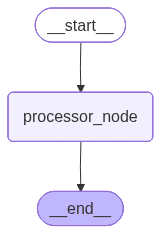

In [15]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
result = app.invoke({"name": "Ericson", "operation": "+", "values": [4, 5, 6, 7]})

In [23]:
result["result"]

'Hi Ericson, your answer is: 22'